In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%pip install quandl
import quandl

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = quandl.get("NSE/TATAGLOBAL")

In [5]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-28,118.0,120.50,117.20,118.15,118.25,835593.0,994.01
2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134.0,2791.03
2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191.0,3112.68
2010-08-02,117.3,118.50,116.60,118.10,117.30,663593.0,779.85


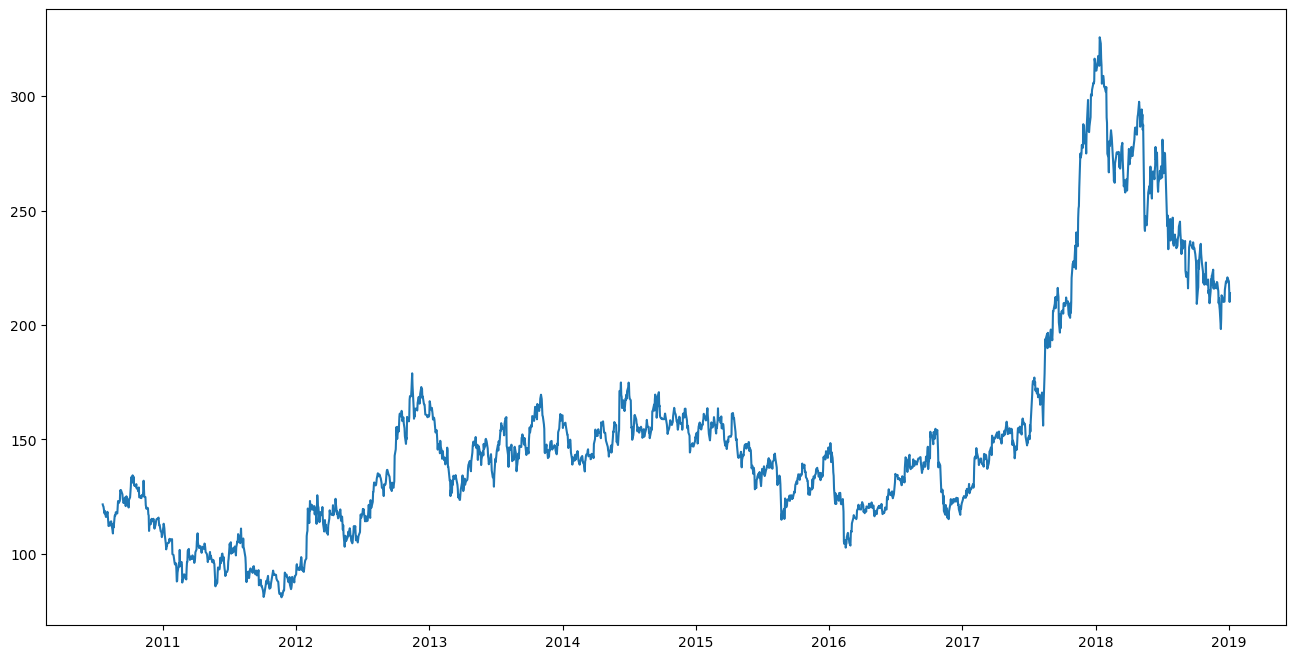

In [7]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')

In [8]:
data['Open - Close'] = data['Open'] - data['Close']   //Input Features to predict whether customer should but or sell the stock
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [9]:
# Classification Problem to whether but or sell the stock
X= data[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [12]:
Y = np.where(data['Close'].shift(-1) > data['Close'],1,-1)
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params, cv =5)

model.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

 


Train_data Accuracy: 0.64
Test_data Accuracy: 0.54


In [26]:
prediction_classification = model.predict(X_test)

In [29]:
actual_predicted_data =pd.DataFrame({'Actual Class': Y_test, 'Predicted Class': prediction_classification})

In [30]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,-1,-1
1,-1,1
2,-1,-1
3,-1,1
4,1,-1
5,1,-1
6,-1,-1
7,1,1
8,-1,-1
9,-1,-1


In [22]:
Y= data['Close']
Y

Date
2010-07-21    121.55
2010-07-22    120.90
2010-07-23    120.65
2010-07-26    117.60
2010-07-27    118.65
               ...  
2018-12-31    219.40
2019-01-01    219.10
2019-01-02    214.60
2019-01-03    210.05
2019-01-04    213.80
Name: Close, Length: 2100, dtype: float64

In [ ]:
"Implementation of KNN Regression"

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
X_train_reg, X_test_reg , Y_train_reg, Y_test_reg = train_test_split(X,Y,test_size =0.25)

params = {'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,4,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params,cv=5)
 
model_reg.fit(X_train_reg, Y_train_reg)
predictions =  model_reg.predict(X_test_reg)

In [36]:
print(predictions)

[146.55333333 199.97333333 155.97       137.44666667 136.87666667
 118.71       121.92       143.06       136.01333333 148.64666667
 114.51333333 150.39666667 183.72       137.74666667 151.20333333
 185.1        130.20333333 168.99       143.14       134.99333333
 135.93       148.35666667 181.72666667 134.32333333 156.42666667
 133.33333333 137.83333333 148.23333333 117.31333333 140.10333333
 225.66666667 140.94333333 155.84       116.24       224.47
 128.81       117.47       204.62666667 136.61666667 133.55333333
 120.67666667 132.42333333 154.05333333 154.22       143.21666667
 174.41       134.27       117.57666667 187.51666667 134.18
 151.79333333 209.97333333 139.55666667 219.37333333 167.53666667
 230.12333333 230.50666667 189.15333333 129.3        114.02
 178.60666667 226.38666667 173.54333333 137.52333333 136.32333333
 146.83333333 122.27       115.96       143.26333333 168.80333333
 128.01333333 151.05666667 118.44333333 201.23       210.39
 149.85333333 135.76333333 137.3  

In [40]:
rms = np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(predictions)),2)))
rms

154.9836676057484

In [42]:
valid = pd.DataFrame({'Actual Close': Y_test_reg, 'Predicted Close Value': predictions})
valid.head(10)

,Actual Close,Predicted Close Value
Date,,
2017-01-13,128.35,146.553333
2018-03-16,272.40,199.973333
2016-11-03,131.35,155.970000
2016-10-28,139.95,137.446667
2013-10-18,164.20,136.876667
2011-09-12,91.05,118.710000
2016-12-30,122.00,121.920000
2012-08-24,128.85,143.060000
2017-04-12,151.75,136.013333


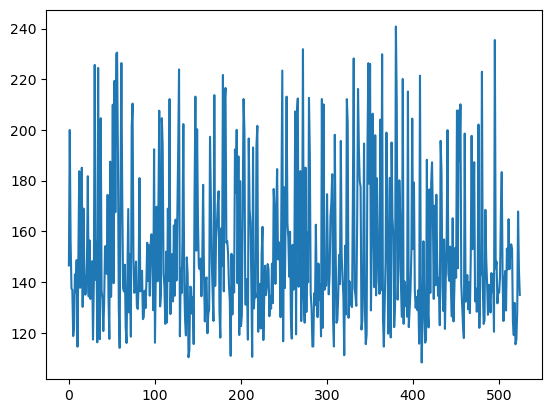

In [43]:
plt.plot(predictions)